In [ ]:
!git clone https://gitlab.com/juan.ardiles/Cifar10/

Cloning into 'Cifar10'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 75 (delta 17), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (75/75), done.
Checking out files: 100% (25/25), done.


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers as L
import time
from random import seed
from random import randint
(x_train, y_train), (x_valid, y_valid) = keras.datasets.cifar10.load_data()
x_train = x_train/255.0
x_valid = x_valid/255.0
# x_train = np.expand_dims(x_train, axis=3)
# x_valid = np.expand_dims(x_valid, axis=3)
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)

T_EPOCHS = 50
S_EPOCHS = 20
IMAGE_SIZE = x_train.shape[1:]
BATCH_SIZE = 512
N_CLASSES = y_train.shape[-1]
IMAGE_SIZE, N_CLASSES

def nn_callbacks():
    es = keras.callbacks.EarlyStopping(
        patience=5, verbose=1, restore_best_weights=True, min_delta=1e-4
    )
    rlp = keras.callbacks.ReduceLROnPlateau(patience=2, verbose=1)
    return [es, rlp]

d_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
d_valid = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

del x_train, x_valid, y_train, y_valid

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
import numpy as np
import tensorflow as tf
history1=np.load('Cifar10/history1.npy',allow_pickle='TRUE').item()
history2=np.load('Cifar10/history2.npy',allow_pickle='TRUE').item()
history5=np.load('Cifar10/history5.npy',allow_pickle='TRUE').item()
history0=np.load('Cifar10/solito.npy',allow_pickle='TRUE').item()


teacher1 = tf.keras.models.load_model('Cifar10/teacher1.h5')
teacher2 = tf.keras.models.load_model('Cifar10/teacher2.h5')
teacher3 = tf.keras.models.load_model('Cifar10/teacher3.h5')
teacher4 = tf.keras.models.load_model('Cifar10/teacher4.h5')
teacher5 = tf.keras.models.load_model('Cifar10/teacher5.h5')


student1_model = tf.keras.models.load_model('Cifar10/student1.h5')
student2_model = tf.keras.models.load_model('Cifar10/student2.h5')
student5_model = tf.keras.models.load_model('Cifar10/student5.h5')
student5R_model = tf.keras.models.load_model('Cifar10/student5R.h5')
student5N_model = tf.keras.models.load_model('Cifar10/student5N.h5')



In [ ]:
history5R_l=np.load('Cifar10/history5_l.npy',allow_pickle='TRUE')
history5R_vl=np.load('Cifar10/history5R_vl.npy',allow_pickle='TRUE')
history5R_a=np.load('Cifar10/history5_a.npy',allow_pickle='TRUE')
history5R_va=np.load('Cifar10/history5_val_a.npy',allow_pickle='TRUE')


history5N_l=np.load('Cifar10/history5N_l.npy',allow_pickle='TRUE')
history5N_vl=np.load('Cifar10/history5N_vl.npy',allow_pickle='TRUE')
history5N_a=np.load('Cifar10/history5N_a.npy',allow_pickle='TRUE')
history5N_va=np.load('Cifar10/history5N_val_a.npy',allow_pickle='TRUE')

print(history5R_vl)

[1.11715424 1.11283839 1.14749336 1.06510389 1.07669306 1.00226903
 0.95463574 0.87623036 0.84190416 0.77995348 0.79297233 0.77001625
 0.70358002 0.66546685 0.65164614 0.63298857 0.64925361 0.62265134
 0.58434659 0.60121584]


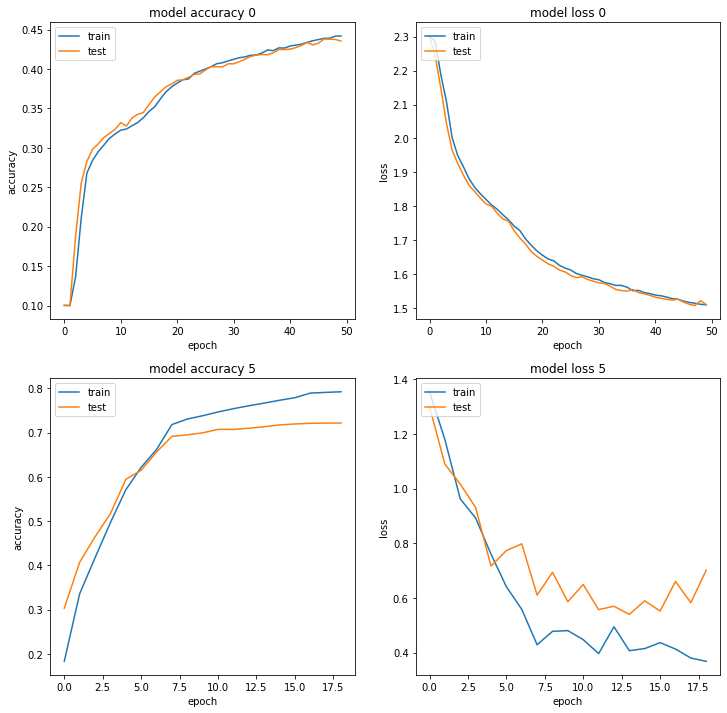

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax =plt.subplot(2,2,1)
plt.plot(history0['accuracy'])
plt.plot(history0['val_accuracy'])
plt.title('model accuracy 0')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax =plt.subplot(2,2,2)
plt.plot(history0['loss'])
plt.plot(history0['val_loss'])
plt.title('model loss 0')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

ax =plt.subplot(2,2,3)
plt.plot(history5['accuracy'])
plt.plot(history5['val_accuracy'])
plt.title('model accuracy 5')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

ax =plt.subplot(2,2,4)
plt.plot(history5['loss'])
plt.plot(history5['val_loss'])
plt.title('model loss 5')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


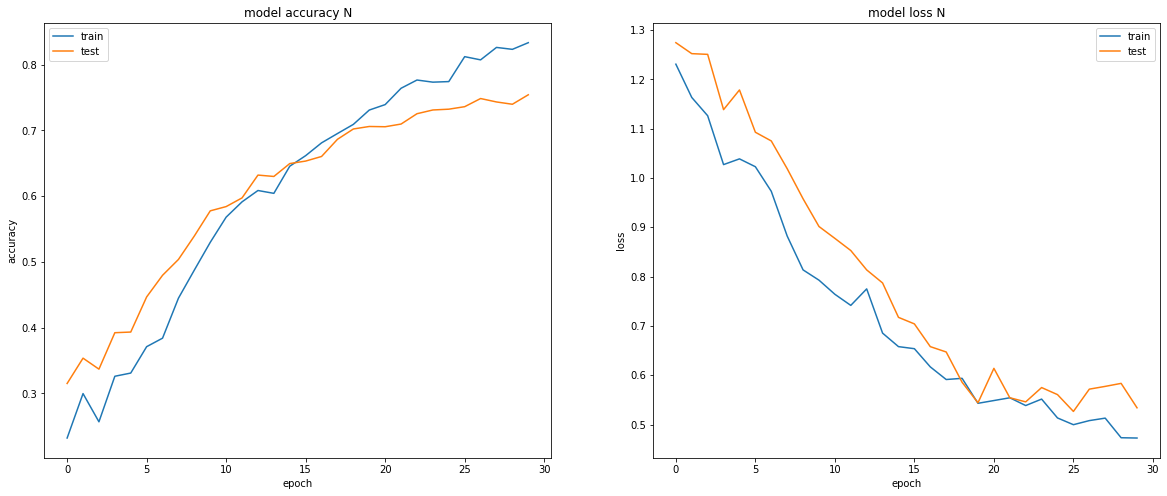

In [ ]:
import matplotlib.pyplot as plt
epoch=np.arange(0, 30, 1, dtype=int)
fig = plt.figure(figsize=(20, 8))
ax =plt.subplot(1,2,1)
plt.plot(epoch, history5N_a)
plt.plot(epoch, history5N_va)
plt.title('model accuracy N')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax =plt.subplot(1,2,2)
plt.plot(epoch, history5N_l)
plt.plot(epoch, history5N_vl)
plt.title('model loss N')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [ ]:
import os
print('Distilled Model N:')
student5N_model.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/student5R.h5')/1024**2, 2), "MB")

Distilled Model N:
20/20 [==============================] - 1s 43ms/step - loss: 0.7660 - accuracy: 0.7541
File Size is : 6.09 MB


In [ ]:
import os

print('Teacher Model 1:')
teacher1.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/teacher1.h5')/1024**2, 2), "MB")

print('Teacher Model 2:')
teacher2.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/teacher2.h5')/1024**2, 2), "MB")

print('Teacher Model 3:')
teacher3.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/teacher3.h5')/1024**2, 2), "MB")

print('Teacher Model 4:')
teacher4.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/teacher4.h5')/1024**2, 2), "MB")

print('Teacher Model 5:')
teacher5.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/teacher5.h5')/1024**2, 2), "MB")

print('Distilled Model:')
student1_model.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/student1.h5')/1024**2, 2), "MB")

print('Distilled Model 2:')
student2_model.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/student2.h5')/1024**2, 2), "MB")


print('Distilled Model 5:')
student5_model.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/student5.h5')/1024**2, 2), "MB")

print('Distilled Model 5R:')
student5R_model.evaluate(d_valid.shuffle(1024, 19).batch(BATCH_SIZE))
print("File Size is :", round(os.path.getsize('Cifar10/student5R.h5')/1024**2, 2), "MB")

Teacher Model 1:
20/20 [==============================] - 2s 73ms/step - loss: 0.5752 - accuracy: 0.8141
File Size is : 229.35 MB
Teacher Model 2:
20/20 [==============================] - 2s 71ms/step - loss: 0.5731 - accuracy: 0.8131
File Size is : 229.35 MB
Teacher Model 3:
20/20 [==============================] - 1s 70ms/step - loss: 0.5718 - accuracy: 0.8116
File Size is : 229.35 MB
Teacher Model 4:
20/20 [==============================] - 1s 71ms/step - loss: 0.5696 - accuracy: 0.8108
File Size is : 229.35 MB
Teacher Model 5:
20/20 [==============================] - 1s 70ms/step - loss: 0.5734 - accuracy: 0.8117
File Size is : 229.35 MB
Distilled Model:
20/20 [==============================] - 1s 39ms/step - loss: 0.7739 - accuracy: 0.7379
File Size is : 6.09 MB
Distilled Model 2:
20/20 [==============================] - 1s 40ms/step - loss: 0.8911 - accuracy: 0.7268
File Size is : 6.09 MB
Distilled Model 5:
20/20 [==============================] - 1s 40ms/step - loss: 0.8507 - ac